### NAME :- ROHAN KUMAR
### REGISTRATION No. :- 12016504
### SECTION :- K20KT
### ROLL No. :- RK20KTB59

## CRIMES IN CHICAGO 2012-2017

#### CONTEXT

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2012 to 2017. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified.

Disclaimer: These crimes may be based upon preliminary information supplied to the Police Department by the reporting parties that have not been verified. The preliminary crime classifications may be changed at a later date based upon additional investigation and there is always the possibility of mechanical or human error. Therefore, the Chicago Police Department does not guarantee (either expressed or implied) the accuracy, completeness, timeliness, or correct sequencing of the information and the information should not be used for comparison purposes over time. The Chicago Police Department will not be responsible for any error or omission, or for the use of, or the results obtained from the use of this information. All data visualizations on maps should be considered approximate and attempts to derive specific addresses are strictly prohibited.
The Chicago Police Department is not responsible for the content of any off-site pages that are referenced by or that reference this web page other than an official City of Chicago or Chicago Police Department web page. The user specifically acknowledges that the Chicago Police Department is not responsible for any defamatory, offensive, misleading, or illegal conduct of other users, links, or third parties and that the risk of injury from the foregoing rests entirely with the user. The unauthorized use of the words "Chicago Police Department," "Chicago Police," or any colorable imitation of these words or the unauthorized use of the Chicago Police Department logo is unlawful. This web page does not, in any way, authorize such use. Data are updated daily. The dataset contains more than 10,00,000 records/rows of data and cannot be viewed in full in Microsoft Excel. To access a list of Chicago Police Department - Illinois Uniform Crime Reporting (IUCR) codes, go to http://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e

#### CONTENT

ID           - Unique identifier for the record.

Case Number  - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

Date         - Date when the incident occurred. this is sometimes a best estimate.

Block        - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

IUCR         - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the                  list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

Primary Type - The primary description of the IUCR code.

Description  - The secondary description of the IUCR code, a subcategory of the primary description.

Location Description - Description of the location where the incident occurred.

Arrest - Indicates whether an arrest was made.

Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Y Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Year - Year the incident occurred.

Updated On - Date and time the record was last updated.

Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

#### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

#### IMPORTING DATASET

In [2]:
crime_df = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

In [3]:
crime_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
crime_df.tail(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


In [5]:
crime_df.shape

(1456714, 23)

#### My dataset consists of 1456714 ROWS and 23 COLUMNS

In [6]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

#### It consist of 4 columns of data type INT64, 10 columns of data type OBJECT, 7 columns of FLOAT64, and 2 columns of BOOL

## DATA CLEANING

#### DELETING THE UNNAMED COLUMN AND UNNECESSARY COLUMNS

In [7]:
crime_df.columns.str.match("Unnamed")

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [8]:
crime_df.loc[:,~crime_df.columns.str.match("Unnamed")]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [9]:
df = crime_df.drop("Unnamed: 0",axis = 1)
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [10]:
df['Updated On'].value_counts()

02/04/2016 06:33:39 AM    908366
08/17/2015 03:03:40 PM    158320
04/15/2016 03:49:27 PM      7854
09/10/2015 11:43:14 AM      6479
10/09/2015 03:58:54 PM      6030
                           ...  
04/15/2016 11:07:31 AM         4
02/04/2016 03:46:32 PM         3
04/15/2016 03:54:12 PM         2
01/15/2016 03:50:24 PM         1
01/10/2016 04:05:09 PM         1
Name: Updated On, Length: 959, dtype: int64

In [11]:
df.loc[crime_df['Updated On'] == '02/04/2016 06:33:39 AM']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
23378,8422829,HV101834,01/02/2012 04:00:00 AM,0000X N AUSTIN BLVD,0810,THEFT,OVER $500,ALLEY,False,False,...,29.0,25.0,06,1136381.0,1899707.0,2012,02/04/2016 06:33:39 AM,41.880960,-87.774684,"(41.880960201, -87.77468384)"
23379,8423354,HV102371,01/02/2012 05:30:00 PM,101XX S STATE ST,0460,BATTERY,SIMPLE,STREET,False,True,...,9.0,49.0,08B,1178049.0,1837528.0,2012,02/04/2016 06:33:39 AM,41.709489,-87.623567,"(41.7094889, -87.623567444)"
23380,8427745,HV106008,01/05/2012 04:30:00 PM,058XX N MOZART ST,0810,THEFT,OVER $500,ALLEY,False,False,...,40.0,2.0,06,1156298.0,1938473.0,2012,02/04/2016 06:33:39 AM,41.986958,-87.700499,"(41.986957869, -87.700498748)"
23381,8431264,HV109797,01/08/2012 02:50:00 PM,002XX S CANAL ST,0460,BATTERY,SIMPLE,STREET,False,False,...,2.0,28.0,08B,1173178.0,1899203.0,2012,02/04/2016 06:33:39 AM,41.878840,-87.639583,"(41.878840427, -87.639582928)"
23382,8431909,HV110479,01/07/2012 07:00:00 PM,041XX N MARINE DR,0810,THEFT,OVER $500,OTHER,False,False,...,46.0,3.0,06,1171101.0,1928058.0,2012,02/04/2016 06:33:39 AM,41.958066,-87.646361,"(41.958065808, -87.646360506)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417065,9291937,HW437071,09/03/2013 02:12:00 PM,028XX W 63RD ST,0460,BATTERY,SIMPLE,SMALL RETAIL STORE,False,False,...,15.0,66.0,08B,1158313.0,1862737.0,2013,02/04/2016 06:33:39 AM,41.779090,-87.695159,"(41.779090123, -87.695158983)"
1417066,9579473,HX230145,04/19/2014 11:39:00 PM,028XX W 63RD ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,15.0,66.0,18,1158313.0,1862737.0,2014,02/04/2016 06:33:39 AM,41.779090,-87.695159,"(41.779090123, -87.695158983)"
1417067,9681386,HX331643,07/05/2014 12:05:00 AM,028XX W 63RD ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,...,15.0,66.0,24,1158313.0,1862737.0,2014,02/04/2016 06:33:39 AM,41.779090,-87.695159,"(41.779090123, -87.695158983)"
1417068,9849133,HX497527,11/06/2014 04:00:00 PM,028XX W 63RD ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,15.0,66.0,06,1158313.0,1862737.0,2014,02/04/2016 06:33:39 AM,41.779090,-87.695159,"(41.779090123, -87.695158983)"


#### We can remove "Updated On" Column as we don't have any idea about it. It can be represent about the case updation, whether it is closed or not, but here is a problem, that we don't have any columns on "Judgement". We have no data regarding "case dates" and all. Another thing is if we say that the updated date represent the dates on which the whole data was being updated, then we don't have any use of this column becase we don't have anything to do with updation date.

In [12]:
df = df.drop("Updated On", axis = 1)
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,10.0,28.0,30.0,08B,1159105.0,1888300.0,2016,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,...,7.0,17.0,69.0,14,1175230.0,1856183.0,2016,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,...,8.0,15.0,66.0,04B,1161027.0,1862810.0,2016,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,4.0,7.0,46.0,08B,1197261.0,1850727.0,2016,41.745252,-87.552773,"(41.745251975, -87.552773464)"


#### We don't need X - Coordinate and Y - Coordinate as its the coordinates based on US System.

In [13]:
df = df.drop(["X Coordinate", "Y Coordinate"], axis = 1)
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,2016,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,2016,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,2016,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,2016,41.745252,-87.552773,"(41.745251975, -87.552773464)"


### Missing Value Analysis

In [14]:
missing_values = df.isnull().sum()
missing_values

ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
Year                        0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [15]:
percentage_missing_values = (df.isnull().sum() * 100 / len(df)).round(2)
percentage_missing_values

ID                      0.00
Case Number             0.00
Date                    0.00
Block                   0.00
IUCR                    0.00
Primary Type            0.00
Description             0.00
Location Description    0.11
Arrest                  0.00
Domestic                0.00
Beat                    0.00
District                0.00
Ward                    0.00
Community Area          0.00
FBI Code                0.00
Year                    0.00
Latitude                2.55
Longitude               2.55
Location                2.55
dtype: float64

In [16]:
missing_data = pd.concat([missing_values, percentage_missing_values], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
ID,0,0.00
Case Number,1,0.00
Date,0,0.00
Block,0,0.00
IUCR,0,0.00
Primary Type,0,0.00
Description,0,0.00
Location Description,1658,0.11
Arrest,0,0.00
Domestic,0,0.00


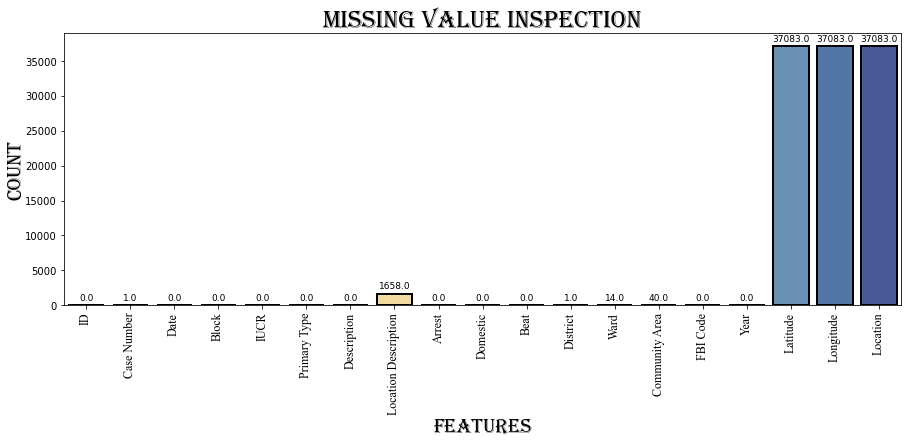

In [17]:
f, ax = plt.subplots(figsize = (15, 5))
plt.xticks(font = "Times new roman", fontsize = 12, rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Total'], palette = 'RdYlBu', lw = 2, ec = 'Black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 9, xytext = (0, 3), textcoords = 'offset points')
cplot.set_title('Missing Value Inspection', font = 'Algerian', fontsize = 25, weight = 'bold')
cplot.set_ylabel('Count', font = 'Algerian', fontsize = 20)
cplot.set_xlabel('Features', font = 'Algerian', fontsize = 20);

#### FOR "Case Number" COLUMN

In [18]:
null = pd.isnull(df["Case Number"])
df[null]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
1274521,8475075,NaN,02/08/2012 10:00:00 PM,032XX N KILDARE AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1731,17.0,31.0,16.0,05,2012,NaN,NaN,NaN


In [19]:
df1 = df.dropna(subset=['Case Number'])

In [20]:
df1['Case Number'].isna().sum()

0

#### FOR "Location Description" COLUMN

In [21]:
df1['Location Description'].isna().sum()

1658

In [22]:
df1[df1['Location Description'].isna()]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
98,10509988,HZ250746,05/03/2016 04:35:00 PM,029XX N SHEFFIELD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,True,False,1933,19.0,44.0,6.0,11,2016,41.934969,-87.653937,"(41.934968944, -87.653936849)"
133,10511522,HZ251882,05/03/2016 08:00:00 AM,033XX N Page Ave,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,NaN,False,False,1631,16.0,36.0,17.0,11,2016,41.940042,-87.827625,"(41.940042028, -87.827625466)"
171,10515761,HZ257158,03/09/2016 10:45:00 AM,002XX E OHIO ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1834,18.0,42.0,8.0,11,2016,NaN,NaN,NaN
471,10509989,HZ251113,05/04/2016 12:00:00 PM,047XX N KIMBALL AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1723,17.0,33.0,14.0,11,2016,41.967316,-87.713331,"(41.96731629, -87.713331369)"
690,10511523,HZ252317,05/04/2016 10:00:00 AM,035XX N LAKE SHORE DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1925,19.0,46.0,6.0,11,2016,41.948068,-87.643126,"(41.948068465, -87.643126381)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456610,10827188,JA128449,01/09/2017 04:15:00 PM,005XX N HALSTED ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1214,12.0,27.0,24.0,11,2017,NaN,NaN,NaN
1456612,10827196,JA128351,01/10/2017 10:35:00 PM,045XX N MAGNOLIA AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1913,19.0,46.0,3.0,11,2017,NaN,NaN,NaN
1456613,10827197,JA128354,12/28/2016 04:20:00 PM,023XX W WABANSIA AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1434,14.0,1.0,24.0,11,2016,NaN,NaN,NaN
1456614,10827200,JA128245,01/03/2017 09:00:00 AM,016XX W Superior St,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,1215,12.0,1.0,24.0,11,2017,NaN,NaN,NaN


#### We can't locate the exact crime spot by using mode because it also depends on what type of crime is that. SO we just drop them.

In [23]:
df1 = df1.dropna(subset=['Location Description'])
df1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,2016,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,2016,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,2016,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,2016,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,2016,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,2016,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,2016,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [24]:
df1['Location Description'].isna().sum()

0

#### FOR "District" COLUMN

In [25]:
df1[df1['District'].isna()]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
537945,9164149,HW309043,06/07/2013 08:13:00 PM,024XX E 71ST ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,334,NaN,7.0,43.0,18,2013,41.764684,-87.684162,"(41.764684067, -87.684162299)"


In [26]:
df1.loc[df1['Block'] == '024XX E 71ST ST']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
23710,9186662,HW331934,06/23/2013 03:05:00 PM,024XX E 71ST ST,0820,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),False,True,334,3.0,7.0,43.0,06,2013,NaN,NaN,NaN
23726,9207986,HW354154,07/08/2013 10:00:00 PM,024XX E 71ST ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,NURSING HOME/RETIREMENT HOME,False,False,334,3.0,7.0,43.0,04B,2013,NaN,NaN,NaN
23777,9299873,HW445002,08/29/2013 01:30:00 PM,024XX E 71ST ST,0820,THEFT,$500 AND UNDER,STREET,False,False,334,3.0,7.0,43.0,06,2013,NaN,NaN,NaN
23790,9326258,HW469477,09/16/2013 12:00:00 PM,024XX E 71ST ST,0890,THEFT,FROM BUILDING,OTHER,False,False,334,3.0,7.0,43.0,06,2013,NaN,NaN,NaN
24301,9509937,HX164110,12/17/2013 09:00:00 AM,024XX E 71ST ST,1120,DECEPTIVE PRACTICE,FORGERY,NURSING HOME/RETIREMENT HOME,False,False,334,3.0,7.0,43.0,10,2013,NaN,NaN,NaN
24748,9584452,HX234405,04/23/2014 02:50:00 PM,024XX E 71ST ST,0820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,True,False,334,3.0,7.0,43.0,06,2014,NaN,NaN,NaN
25101,9609947,HX260214,05/13/2014 06:15:00 AM,024XX E 71ST ST,0820,THEFT,$500 AND UNDER,STREET,False,False,334,3.0,7.0,43.0,06,2014,NaN,NaN,NaN
25794,9668975,HX318671,06/25/2014 05:00:00 PM,024XX E 71ST ST,0820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,334,3.0,7.0,43.0,06,2014,NaN,NaN,NaN
25922,9678306,HX328019,07/01/2014 11:30:00 AM,024XX E 71ST ST,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,True,334,3.0,7.0,43.0,08A,2014,NaN,NaN,NaN
26383,9721958,HX372155,08/03/2014 03:30:00 AM,024XX E 71ST ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,False,334,3.0,5.0,43.0,08B,2014,NaN,NaN,NaN


In [27]:
df1 = df1.dropna(subset=['District'])

In [28]:
df1['District'].isna().sum()

0

#### FOR "Ward" COLUMN

In [29]:
df1[df1['Ward'].isna()]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
43786,9940426,HY114520,01/14/2015 10:15:00 AM,007XX W OHARE ST,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,AIRPORT EXTERIOR - SECURE AREA,True,False,1654,16.0,NaN,0.0,26,2015,42.006074,-87.927365,"(42.006074109, -87.927364891)"
90748,8446048,HV117339,01/14/2012 06:13:00 AM,007XX W OHARE ST,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,AIRPORT EXTERIOR - SECURE AREA,True,False,1654,16.0,NaN,76.0,26,2012,42.006074,-87.927365,"(42.006074109, -87.927364891)"
94281,8452081,HV122370,01/17/2012 04:00:00 PM,005XX W OHARE ST,0810,THEFT,OVER $500,AIRPORT EXTERIOR - NON-SECURE AREA,False,False,1654,16.0,NaN,76.0,06,2012,41.966845,-87.877444,"(41.966844891, -87.877443913)"
132444,8514335,HV184279,03/05/2012 02:35:00 PM,007XX W OHARE ST,1350,CRIMINAL TRESPASS,TO STATE SUP LAND,AIRPORT EXTERIOR - SECURE AREA,True,False,1654,16.0,NaN,0.0,26,2012,42.006074,-87.927365,"(42.006074109, -87.927364891)"
186232,8602602,HV276626,05/04/2012 04:30:00 AM,065XX N MANNHEIM RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1654,16.0,NaN,0.0,07,2012,41.997193,-87.884464,"(41.997193305, -87.884463632)"
220291,8655272,HV296448,05/21/2012 02:05:00 PM,064XX N MANNHEIM RD,2022,NARCOTICS,POSS: COCAINE,STREET,True,False,1654,16.0,NaN,0.0,18,2012,41.995722,-87.884463,"(41.99572241, -87.884462932)"
221417,8657230,HV302379,05/25/2012 05:55:00 AM,007XX W OHARE ST,1121,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,AIRPORT EXTERIOR - NON-SECURE AREA,True,False,1654,16.0,NaN,0.0,10,2012,42.006074,-87.927365,"(42.006074109, -87.927364891)"
374947,8898623,HV572361,11/16/2012 10:00:00 AM,056XX N FAIRVIEW AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,RESIDENCE,False,False,1614,16.0,NaN,0.0,10,2012,41.983018,-87.834197,"(41.983017755, -87.834196515)"
471537,9058946,HW203626,03/22/2013 09:00:00 PM,056XX N FAIRVIEW AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,DRIVEWAY - RESIDENTIAL,False,False,1614,16.0,NaN,0.0,14,2013,41.983018,-87.834197,"(41.983017755, -87.834196515)"
559040,9197341,HW333864,06/23/2013 08:15:00 PM,007XX W OHARE ST,0820,THEFT,$500 AND UNDER,AIRPORT EXTERIOR - SECURE AREA,False,False,1654,16.0,NaN,0.0,06,2013,42.006074,-87.927365,"(42.006074109, -87.927364891)"


In [30]:
df1.loc[df1['Block'] == '005XX W OHARE ST']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
4439,10517995,HZ252446,04/23/2016 07:30:00 PM,005XX W OHARE ST,1206,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",AIRPORT VENDING ESTABLISHMENT,False,False,1654,16.0,41.0,76.0,11,2016,41.980826,-87.883611,"(41.980826277, -87.883611316)"
8079,10527903,HZ260348,02/23/2016 12:00:00 AM,005XX W OHARE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,OTHER COMMERCIAL TRANSPORTATION,False,False,1654,16.0,41.0,76.0,07,2016,NaN,NaN,NaN
9753,10501089,HZ241865,04/23/2016 06:33:00 PM,005XX W OHARE ST,1206,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",AIRPORT VENDING ESTABLISHMENT,False,False,1654,16.0,41.0,76.0,11,2016,41.981296,-87.885098,"(41.981295861, -87.885097567)"
10132,10511264,HZ252184,04/26/2016 12:01:00 AM,005XX W OHARE ST,1206,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1654,16.0,41.0,76.0,11,2016,41.980826,-87.883611,"(41.980826277, -87.883611316)"
10525,10519907,HZ259779,05/02/2016 12:01:00 AM,005XX W OHARE ST,1206,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",AIRPORT EXTERIOR - NON-SECURE AREA,False,False,1654,16.0,41.0,76.0,11,2016,41.980826,-87.883611,"(41.980826277, -87.883611316)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451333,10814685,JA111571,01/11/2017 09:10:00 AM,005XX W OHARE ST,0460,BATTERY,SIMPLE,AIRPORT EXTERIOR - NON-SECURE AREA,False,False,1654,16.0,41.0,76.0,08B,2017,NaN,NaN,NaN
1451352,10814861,JA112621,01/11/2017 10:13:00 PM,005XX W OHARE ST,1360,CRIMINAL TRESPASS,TO VEHICLE,AIRPORT VENDING ESTABLISHMENT,True,False,1654,16.0,41.0,76.0,26,2017,NaN,NaN,NaN
1452107,10819835,JA118983,08/11/2016 12:00:00 PM,005XX W OHARE ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,PARKING LOT/GARAGE(NON.RESID.),False,False,1654,16.0,41.0,76.0,07,2016,NaN,NaN,NaN
1452184,10820797,JA118843,09/24/2016 08:29:00 AM,005XX W OHARE ST,1206,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",AIRPORT VENDING ESTABLISHMENT,False,False,1654,16.0,41.0,76.0,11,2016,NaN,NaN,NaN


In [31]:
df1.loc[df1['Block'] == '056XX N FAIRVIEW AVE']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
374947,8898623,HV572361,11/16/2012 10:00:00 AM,056XX N FAIRVIEW AVE,1122,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,RESIDENCE,False,False,1614,16.0,NaN,0.0,10,2012,41.983018,-87.834197,"(41.983017755, -87.834196515)"
471537,9058946,HW203626,03/22/2013 09:00:00 PM,056XX N FAIRVIEW AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,DRIVEWAY - RESIDENTIAL,False,False,1614,16.0,NaN,0.0,14,2013,41.983018,-87.834197,"(41.983017755, -87.834196515)"
739209,9494842,HX149198,02/11/2014 10:30:00 PM,056XX N FAIRVIEW AVE,0810,THEFT,OVER $500,RESIDENTIAL YARD (FRONT/BACK),False,False,1614,16.0,NaN,0.0,06,2014,41.982993,-87.834219,"(41.982993154, -87.834218775)"
1137038,10266945,HY454232,10/08/2015 10:00:00 AM,056XX N FAIRVIEW AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE-GARAGE,False,False,1614,16.0,NaN,0.0,14,2015,41.983029,-87.834185,"(41.983028684, -87.834185395)"


In [32]:
df1.loc[df1['Block'] == '064XX N MANNHEIM RD']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
220291,8655272,HV296448,05/21/2012 02:05:00 PM,064XX N MANNHEIM RD,2022,NARCOTICS,POSS: COCAINE,STREET,True,False,1654,16.0,NaN,0.0,18,2012,41.995722,-87.884463,"(41.99572241, -87.884462932)"


In [33]:
df1.loc[df1['Block'] == '065XX N MANNHEIM RD']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
186232,8602602,HV276626,05/04/2012 04:30:00 AM,065XX N MANNHEIM RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1654,16.0,NaN,0.0,07,2012,41.997193,-87.884464,"(41.997193305, -87.884463632)"
715002,9451711,HX105019,12/19/2013 01:35:00 PM,065XX N MANNHEIM RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1654,16.0,NaN,0.0,07,2013,41.997193,-87.884464,"(41.997193305, -87.884463632)"
933404,9827727,HX464897,10/12/2014 02:30:00 PM,065XX N MANNHEIM RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1654,16.0,NaN,0.0,14,2014,41.997336,-87.884466,"(41.997336014, -87.884466308)"


In [34]:
ward = df1.loc[df1['Ward'] == 41]
ward

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
23,10509011,HZ250748,05/03/2016 09:00:00 PM,068XX W HIGHLAND AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1611,16.0,41.0,10.0,06,2016,41.995962,-87.797529,"(41.995961517, -87.797528563)"
50,10509336,HZ250909,05/03/2016 08:30:00 PM,066XX W RAVEN ST,0820,THEFT,$500 AND UNDER,STREET,False,False,1611,16.0,41.0,10.0,06,2016,41.993704,-87.794185,"(41.993703853, -87.794185238)"
65,10509526,HZ250665,05/03/2016 06:30:00 PM,060XX N NAVARRE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1611,16.0,41.0,10.0,06,2016,41.990572,-87.793399,"(41.99057177, -87.793398734)"
80,10509784,HZ251276,05/03/2016 08:00:00 PM,062XX N NEWCASTLE AVE,0810,THEFT,OVER $500,STREET,False,False,1611,16.0,41.0,10.0,06,2016,41.994198,-87.796473,"(41.994197554, -87.796472871)"
168,10515629,HZ257915,04/01/2016 12:00:00 PM,072XX N OCONTO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,OTHER,False,False,1611,16.0,41.0,9.0,26,2016,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456633,10827512,JA126794,11/11/2016 01:30:00 AM,008XX W OHARE ST,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,AIRPORT VENDING ESTABLISHMENT,False,False,1654,16.0,41.0,76.0,07,2016,NaN,NaN,NaN
1456635,10827683,JA126646,01/01/2017 12:00:00 AM,0000X W TERMINAL ST,0810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,1651,16.0,41.0,76.0,06,2017,NaN,NaN,NaN
1456640,10827782,JA129112,01/15/2017 12:00:00 PM,051XX N NORMANDY AVE,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,RESIDENCE,False,False,1613,16.0,41.0,10.0,11,2017,NaN,NaN,NaN
1456642,10827787,JA128381,12/14/2016 09:28:00 AM,005XX W OHARE ST,1206,DECEPTIVE PRACTICE,"THEFT BY LESSEE,MOTOR VEH",AIRPORT EXTERIOR - NON-SECURE AREA,False,False,1654,16.0,41.0,76.0,11,2016,NaN,NaN,NaN


In [35]:
ward['District'].value_counts()

16.0    16820
31.0        4
11.0        1
Name: District, dtype: int64

In [36]:
ward.loc[ward['District'] == 31]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
188338,8606256,HV279898,05/08/2012 11:00:00 AM,055XX N CUMBERLAND AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,CTA GARAGE / OTHER PROPERTY,False,False,1614,31.0,41.0,76.0,14,2012,41.979436,-87.836582,"(41.979435936, -87.83658196)"
1070308,10148642,HY338223,07/12/2015 09:00:00 AM,052XX N OTTO AVE,0820,THEFT,$500 AND UNDER,OTHER,False,False,1654,31.0,41.0,76.0,06,2015,41.973534,-87.866809,"(41.973533721, -87.866808789)"
1371822,10697720,HZ446368,09/23/2016 12:00:00 PM,052XX N WESLEY TER,0560,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1654,31.0,41.0,76.0,08A,2016,41.973586,-87.864076,"(41.973585701, -87.864076049)"
1386526,10721026,HZ479122,10/08/2016 01:05:00 AM,115XX W TOUHY AVE,0890,THEFT,FROM BUILDING,AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,False,False,1654,31.0,41.0,76.0,06,2016,42.008885,-87.906473,"(42.008885217, -87.906473187)"


In [37]:
ward.loc[ward['District'] == 11]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
22664,8627260,HV289087,05/16/2012 06:00:00 AM,006XX W OHARE ST,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,GOVERNMENT BUILDING/PROPERTY,True,False,1654,11.0,41.0,76.0,18,2012,41.868181,-87.709271,"(41.868180939, -87.709271389)"


#### As we can see here that all 11, 16, and 31 Districts are in Ward 41. And also, all the NaN values of "Ward" is having 16 as District. So we can replace them with 41.

In [38]:
df1['Ward'] = df1['Ward'].fillna(41.0)

In [39]:
df1['Ward'].isna().sum()

0

#### FOR "Community Area" COLUMN

In [40]:
df1['Community Area'].isna().sum()

40

In [41]:
df2 = df1.copy()
df2['Community Area']=df2['Community Area'].fillna(df2.groupby('Block')['Community Area'].transform('mean'))

In [42]:
temp = df1[df1['Community Area'].isna()]
temp

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
23424,8530927,HV198973,03/15/2012 02:58:58 PM,072XX W 63RD PL,2027,NARCOTICS,POSS: CRACK,RESIDENCE,False,False,1432,14.0,1.0,NaN,18,2012,NaN,NaN,NaN
23574,8999323,HW137470,01/30/2013 10:35:00 AM,074XX W 60TH PL,2022,NARCOTICS,POSS: COCAINE,APARTMENT,False,False,1111,11.0,27.0,NaN,18,2013,NaN,NaN,NaN
23643,9108846,HW229995,04/11/2013 05:00:00 PM,065XX S CICERO AV,2022,NARCOTICS,POSS: COCAINE,HOTEL/MOTEL,False,False,2221,22.0,19.0,NaN,18,2013,NaN,NaN,NaN
23646,9110219,HW235694,04/16/2013 04:41:00 PM,0000X S CDNFIDENTIAL,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),SIDEWALK,False,False,1223,12.0,2.0,NaN,18,2013,NaN,NaN,NaN
23648,9113690,HW196946,03/16/2013 04:31:00 PM,004XX S LAKEHURST RD,2091,NARCOTICS,FORFEIT PROPERTY,STREET,False,False,124,1.0,2.0,NaN,26,2013,NaN,NaN,NaN
23663,9128896,HW266027,05/08/2013 05:55:00 PM,047XX N MANNHEIM RD,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,False,False,2523,25.0,31.0,NaN,18,2013,NaN,NaN,NaN
23749,9248393,HW358223,07/11/2013 12:30:00 PM,006XX N KENILWORTH,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE PORCH/HALLWAY,False,False,915,9.0,11.0,NaN,18,2013,NaN,NaN,NaN
23758,9260987,HW387644,07/31/2013 05:45:05 PM,045XX W 89TH ST,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,False,413,4.0,8.0,NaN,18,2013,NaN,NaN,NaN
23782,9306074,HW429063,08/29/2013 01:40:00 PM,175XX W WINSTON COURT,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,VEHICLE NON-COMMERCIAL,False,False,331,3.0,5.0,NaN,18,2013,NaN,NaN,NaN
23786,9314341,HW327504,06/20/2013 01:36:59 PM,028XX W WABANSIA,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,STREET,False,False,411,4.0,5.0,NaN,07,2013,NaN,NaN,NaN


In [43]:
temp1 = df2[df2['Community Area'].isna()]
temp1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
23424,8530927,HV198973,03/15/2012 02:58:58 PM,072XX W 63RD PL,2027,NARCOTICS,POSS: CRACK,RESIDENCE,False,False,1432,14.0,1.0,NaN,18,2012,NaN,NaN,NaN
23574,8999323,HW137470,01/30/2013 10:35:00 AM,074XX W 60TH PL,2022,NARCOTICS,POSS: COCAINE,APARTMENT,False,False,1111,11.0,27.0,NaN,18,2013,NaN,NaN,NaN
23643,9108846,HW229995,04/11/2013 05:00:00 PM,065XX S CICERO AV,2022,NARCOTICS,POSS: COCAINE,HOTEL/MOTEL,False,False,2221,22.0,19.0,NaN,18,2013,NaN,NaN,NaN
23646,9110219,HW235694,04/16/2013 04:41:00 PM,0000X S CDNFIDENTIAL,2014,NARCOTICS,MANU/DELIVER: HEROIN (WHITE),SIDEWALK,False,False,1223,12.0,2.0,NaN,18,2013,NaN,NaN,NaN
23648,9113690,HW196946,03/16/2013 04:31:00 PM,004XX S LAKEHURST RD,2091,NARCOTICS,FORFEIT PROPERTY,STREET,False,False,124,1.0,2.0,NaN,26,2013,NaN,NaN,NaN
23663,9128896,HW266027,05/08/2013 05:55:00 PM,047XX N MANNHEIM RD,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,False,False,2523,25.0,31.0,NaN,18,2013,NaN,NaN,NaN
23749,9248393,HW358223,07/11/2013 12:30:00 PM,006XX N KENILWORTH,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE PORCH/HALLWAY,False,False,915,9.0,11.0,NaN,18,2013,NaN,NaN,NaN
23758,9260987,HW387644,07/31/2013 05:45:05 PM,045XX W 89TH ST,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,False,413,4.0,8.0,NaN,18,2013,NaN,NaN,NaN
23782,9306074,HW429063,08/29/2013 01:40:00 PM,175XX W WINSTON COURT,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,VEHICLE NON-COMMERCIAL,False,False,331,3.0,5.0,NaN,18,2013,NaN,NaN,NaN
23786,9314341,HW327504,06/20/2013 01:36:59 PM,028XX W WABANSIA,0930,MOTOR VEHICLE THEFT,THEFT/RECOVERY: AUTOMOBILE,STREET,False,False,411,4.0,5.0,NaN,07,2013,NaN,NaN,NaN


In [44]:
a = list(temp1.index)
a

[23424,
 23574,
 23643,
 23646,
 23648,
 23663,
 23749,
 23758,
 23782,
 23786,
 23814,
 23828,
 23841,
 23842,
 24261,
 102034,
 174204,
 188517]

#### By temporarily filling MEAN in the null values of "Community Area" we got those rows in which we have only single row for that 'Block' so we can't fill that null value because we can't predict it. That's why we drop those rows in next step.

In [45]:
df1.drop(a,axis=0,inplace=True)

In [46]:
df1['Community Area'].isna().sum()

22

#### Now we first groupby it according to the "Block" and then fill it with its mode.

In [47]:
df1['Community Area']=df1.groupby('Block')['Community Area'].transform(lambda x: x.fillna(x.mode()[0]))

In [48]:
df1['Community Area'].isna().sum()

0

In [49]:
df1.isna().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        0
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
Year                        0
Latitude                36635
Longitude               36635
Location                36635
dtype: int64

### For 'Latitude' and 'Longitude' Columns

In [50]:
df1[['Latitude','Longitude']].isna().sum()

Latitude     36635
Longitude    36635
dtype: int64

In [51]:
df1[['Latitude','Longitude']] = df1[['Latitude','Longitude']].fillna(df1.groupby('Block')[['Latitude','Longitude']].transform('mean'))

In [52]:
df1[['Latitude','Longitude']].isna().sum()

Latitude     120
Longitude    120
dtype: int64

In [53]:
df1[(df1['Latitude'].isnull())&(df1['Longitude'].isnull())]

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
2855,10521343,HZ262973,04/02/2016 04:30:00 PM,029XX W Belden Ave,0810,THEFT,OVER $500,APARTMENT,False,False,1414,14.0,35.0,22.0,06,2016,NaN,NaN,NaN
5870,21219,B003173,08/25/2013 07:00:00 AM,000XX W 97TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,511,5.0,21.0,49.0,01A,2013,NaN,NaN,NaN
9357,10524497,HZ266303,05/15/2016 07:15:00 PM,0000X E Randolph St,0870,THEFT,POCKET-PICKING,CTA TRAIN,False,False,111,1.0,42.0,32.0,06,2016,NaN,NaN,NaN
12316,10532905,HZ276516,02/23/2016 12:01:00 AM,081XX W CATHERINE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1614,16.0,41.0,10.0,11,2016,NaN,NaN,NaN
13627,10528736,HZ271576,05/19/2016 06:15:00 PM,064XX W KENNEDY EXPY IB,0460,BATTERY,SIMPLE,OTHER,False,False,1612,16.0,41.0,10.0,08B,2016,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451317,10814243,JA113330,01/11/2017 12:00:00 AM,025XX W Chicago Ave,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESTAURANT,False,False,1211,12.0,1.0,24.0,14,2017,NaN,NaN,NaN
1451318,10814244,JA113530,01/11/2017 01:40:00 PM,020XX W Jackson Blvd,0810,THEFT,OVER $500,APARTMENT,False,False,1225,12.0,2.0,28.0,06,2017,NaN,NaN,NaN
1452434,10815280,JA114700,01/13/2017 02:54:00 PM,046XX S DAN RYAN XPRS IB,3710,INTERFERENCE WITH PUBLIC OFFICER,RESIST/OBSTRUCT/DISARM OFFICER,STREET,False,False,925,9.0,3.0,37.0,24,2017,NaN,NaN,NaN
1453166,10815904,JA115580,01/14/2017 06:00:00 AM,047XX W 83RD PL,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,834,8.0,18.0,70.0,05,2017,NaN,NaN,NaN


#### As these rows are those data which have only 1 crime in that area and we don't have its location, so we have to drop all these data.

In [54]:
df1 = df1.dropna(subset=['Latitude', 'Longitude'])

In [55]:
df1[['Latitude','Longitude']].isna().sum()

Latitude     0
Longitude    0
dtype: int64

### For 'Location' Column

In [56]:
df1 = df1.drop('Location', axis = 1)

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454916 entries, 0 to 1456713
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1454916 non-null  int64  
 1   Case Number           1454916 non-null  object 
 2   Date                  1454916 non-null  object 
 3   Block                 1454916 non-null  object 
 4   IUCR                  1454916 non-null  object 
 5   Primary Type          1454916 non-null  object 
 6   Description           1454916 non-null  object 
 7   Location Description  1454916 non-null  object 
 8   Arrest                1454916 non-null  bool   
 9   Domestic              1454916 non-null  bool   
 10  Beat                  1454916 non-null  int64  
 11  District              1454916 non-null  float64
 12  Ward                  1454916 non-null  float64
 13  Community Area        1454916 non-null  float64
 14  FBI Code              1454916 non-

In [58]:
df1['Location'] = df1['Latitude'].astype(str) + ', ' + df1['Longitude'].astype(str)

In [59]:
df1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,41.864073,-87.706819,"41.864073157, -87.706818608"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,41.782922,-87.604363,"41.782921527, -87.60436317"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,2016,41.894908,-87.758372,"41.894908283, -87.758371958"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,2016,41.885687,-87.749516,"41.885686845, -87.749515983"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,2016,41.886297,-87.761751,"41.886297242, -87.761750709"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,2016,41.849222,-87.691556,"41.849222028, -87.69155551"
1456710,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,2016,41.760744,-87.633335,"41.760743949, -87.63333531"
1456711,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,2016,41.779235,-87.685207,"41.779234743, -87.685207125"
1456712,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,2016,41.745252,-87.552773,"41.745251975, -87.552773464"


In [60]:
df1.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
Location                0
dtype: int64

### Duplicate Values Analysis

In [61]:
df1.nunique().to_frame(name = 'Unique Values')

,Unique Values
ID,1454916
Case Number,1454801
Date,581742
Block,32550
IUCR,365
Primary Type,33
Description,342
Location Description,142
Arrest,2
Domestic,2


#### Here we can see that there are 1454801 Unique Case Numbers and as we know that our dataset consists of 1454916 rows in total. That means there are 115 duplicate values in column 'Case Number'.

### Checking whether all the data in the row of those duplicate values of column "Case Number" are same or not.

In [62]:
df1['Case Number'].value_counts()

HZ140230    6
HY346207    4
HZ403466    4
HZ554936    4
HY442430    3
           ..
HW225584    1
HW225565    1
HW225581    1
HW225456    1
HZ250517    1
Name: Case Number, Length: 1454801, dtype: int64

In [63]:
df1.loc[df1['Case Number'] == 'HZ140230']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
7439,22314,HZ140230,02/04/2016 01:00:00 PM,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,824,8.0,16.0,63.0,01A,2016,41.789518,-87.69368,"41.789518444, -87.693680468"
7440,22316,HZ140230,02/04/2016 01:00:00 PM,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,824,8.0,16.0,63.0,01A,2016,41.789518,-87.69368,"41.789518444, -87.693680468"
7441,22317,HZ140230,02/04/2016 01:00:00 PM,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,824,8.0,16.0,63.0,01A,2016,41.789518,-87.69368,"41.789518444, -87.693680468"
7442,22318,HZ140230,02/04/2016 01:00:00 PM,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,824,8.0,16.0,63.0,01A,2016,41.789518,-87.69368,"41.789518444, -87.693680468"
7443,22319,HZ140230,02/04/2016 01:00:00 PM,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,824,8.0,16.0,63.0,01A,2016,41.789518,-87.69368,"41.789518444, -87.693680468"
1215137,22313,HZ140230,02/04/2016 01:00:00 PM,057XX S CALIFORNIA AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,False,824,8.0,16.0,63.0,01A,2016,41.789518,-87.69368,"41.789518444, -87.693680468"


In [64]:
df1.loc[df1['Case Number'] == 'HZ554936']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
1434237,23026,HZ554936,12/17/2016 12:40:00 PM,001XX W 105TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,512,5.0,34.0,49.0,01A,2016,41.703478,-87.626563,"41.703478083, -87.626563168"
1434238,23027,HZ554936,12/17/2016 01:25:00 PM,001XX W 105TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,512,5.0,34.0,49.0,01A,2016,41.703478,-87.626563,"41.703478083, -87.626563168"
1434239,23028,HZ554936,12/17/2016 01:25:00 PM,001XX W 105TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,512,5.0,34.0,49.0,01A,2016,41.703478,-87.626563,"41.703478083, -87.626563168"
1434240,23029,HZ554936,12/17/2016 01:25:00 PM,001XX W 105TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,512,5.0,34.0,49.0,01A,2016,41.703478,-87.626563,"41.703478083, -87.626563168"


In [65]:
df1.loc[df1['Case Number'] == 'HY346207']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
1219130,22335,HY346207,07/04/2015 04:00:00 PM,083XX S DREXEL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,632,6.0,8.0,44.0,01A,2015,41.743284,-87.602581,"41.743284431968, -87.602580961824"
1219131,22336,HY346207,07/04/2015 04:00:00 PM,083XX S DREXEL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,632,6.0,8.0,44.0,01A,2015,41.743284,-87.602581,"41.743284431968, -87.602580961824"
1219132,22337,HY346207,07/04/2015 04:00:00 PM,083XX S DREXEL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,632,6.0,8.0,44.0,01A,2015,41.743284,-87.602581,"41.743284431968, -87.602580961824"
1271150,22002,HY346207,07/04/2015 04:00:00 PM,083XX S DREXEL AVE,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,True,632,6.0,8.0,44.0,01A,2015,41.743299,-87.602580,"41.743299025, -87.602579976"


In [66]:
df1.loc[df1['Case Number'] == 'HZ403466']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
1347547,22746,HZ403466,08/23/2016 01:34:00 AM,081XX S ESSEX AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,422,4.0,7.0,46.0,01A,2016,41.747543,-87.563739,"41.747543344, -87.563739255"
1358045,22744,HZ403466,08/23/2016 01:34:00 AM,081XX S ESSEX AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,422,4.0,7.0,46.0,01A,2016,41.747543,-87.563739,"41.747543344, -87.563739255"
1358046,22745,HZ403466,08/23/2016 01:34:00 AM,081XX S ESSEX AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,422,4.0,7.0,46.0,01A,2016,41.747543,-87.563739,"41.747543344, -87.563739255"
1358047,22747,HZ403466,08/23/2016 01:34:00 AM,081XX S ESSEX AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,422,4.0,7.0,46.0,01A,2016,41.747543,-87.563739,"41.747543344, -87.563739255"


In [67]:
df1.loc[df1['Case Number'] == 'HV217424']

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
1267769,20340,HV217424,03/27/2012 10:58:00 PM,063XX S EVANS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,312,3.0,20.0,42.0,01A,2012,41.779493,-87.607174,"41.779492501, -87.607173759"
1267770,20341,HV217424,03/27/2012 09:58:00 PM,063XX S EVANS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,312,3.0,20.0,42.0,01A,2012,41.779493,-87.607174,"41.779492501, -87.607173759"
1267771,20342,HV217424,03/27/2012 10:57:00 PM,063XX S EVANS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,False,312,3.0,20.0,42.0,01A,2012,41.779493,-87.607174,"41.779492501, -87.607173759"


#### From above analysis we can say that, Yes all the data in rows are same .
#### That means now we can delete these rows.

## Deleting the duplicate rows

In [68]:
df2 = df1.drop_duplicates(subset='Case Number', keep="first")

In [69]:
df2

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,41.864073,-87.706819,"41.864073157, -87.706818608"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,41.782922,-87.604363,"41.782921527, -87.60436317"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,2016,41.894908,-87.758372,"41.894908283, -87.758371958"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,2016,41.885687,-87.749516,"41.885686845, -87.749515983"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,2016,41.886297,-87.761751,"41.886297242, -87.761750709"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,2016,41.849222,-87.691556,"41.849222028, -87.69155551"
1456710,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,2016,41.760744,-87.633335,"41.760743949, -87.63333531"
1456711,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,2016,41.779235,-87.685207,"41.779234743, -87.685207125"
1456712,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,2016,41.745252,-87.552773,"41.745251975, -87.552773464"


In [70]:
df2.nunique().to_frame(name = 'Unique Values')

,Unique Values
ID,1454801
Case Number,1454801
Date,581701
Block,32550
IUCR,365
Primary Type,33
Description,342
Location Description,142
Arrest,2
Domestic,2


In [71]:
df2 = df2.reset_index()
df2.index = df2.index + 1
df2

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
1,0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,41.864073,-87.706819,"41.864073157, -87.706818608"
2,1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,41.782922,-87.604363,"41.782921527, -87.60436317"
3,2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,2016,41.894908,-87.758372,"41.894908283, -87.758371958"
4,3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,2016,41.885687,-87.749516,"41.885686845, -87.749515983"
5,4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,2016,41.886297,-87.761751,"41.886297242, -87.761750709"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454797,1456709,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,2016,41.849222,-87.691556,"41.849222028, -87.69155551"
1454798,1456710,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,2016,41.760744,-87.633335,"41.760743949, -87.63333531"
1454799,1456711,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,2016,41.779235,-87.685207,"41.779234743, -87.685207125"
1454800,1456712,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,2016,41.745252,-87.552773,"41.745251975, -87.552773464"


In [72]:
df2 = df2.drop(['index'],axis=1)
df2

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
1,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,41.864073,-87.706819,"41.864073157, -87.706818608"
2,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,41.782922,-87.604363,"41.782921527, -87.60436317"
3,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,2016,41.894908,-87.758372,"41.894908283, -87.758371958"
4,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,2016,41.885687,-87.749516,"41.885686845, -87.749515983"
5,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,2016,41.886297,-87.761751,"41.886297242, -87.761750709"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454797,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,2016,41.849222,-87.691556,"41.849222028, -87.69155551"
1454798,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,2016,41.760744,-87.633335,"41.760743949, -87.63333531"
1454799,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,2016,41.779235,-87.685207,"41.779234743, -87.685207125"
1454800,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,2016,41.745252,-87.552773,"41.745251975, -87.552773464"


In [73]:
df2.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
Year                    0
Latitude                0
Longitude               0
Location                0
dtype: int64

## DATA CLEANING COMPLETED

# VISUALISATION & ANALYSIS

In [74]:
df2

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location
1,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,41.864073,-87.706819,"41.864073157, -87.706818608"
2,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,41.782922,-87.604363,"41.782921527, -87.60436317"
3,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,2016,41.894908,-87.758372,"41.894908283, -87.758371958"
4,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,2016,41.885687,-87.749516,"41.885686845, -87.749515983"
5,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,2016,41.886297,-87.761751,"41.886297242, -87.761750709"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454797,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,2016,41.849222,-87.691556,"41.849222028, -87.69155551"
1454798,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,2016,41.760744,-87.633335,"41.760743949, -87.63333531"
1454799,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,2016,41.779235,-87.685207,"41.779234743, -87.685207125"
1454800,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,2016,41.745252,-87.552773,"41.745251975, -87.552773464"


### WHAT ARE THE MOST COMMON CRIMES IN CHICAGO? FINDING OUT THE TOP 10.

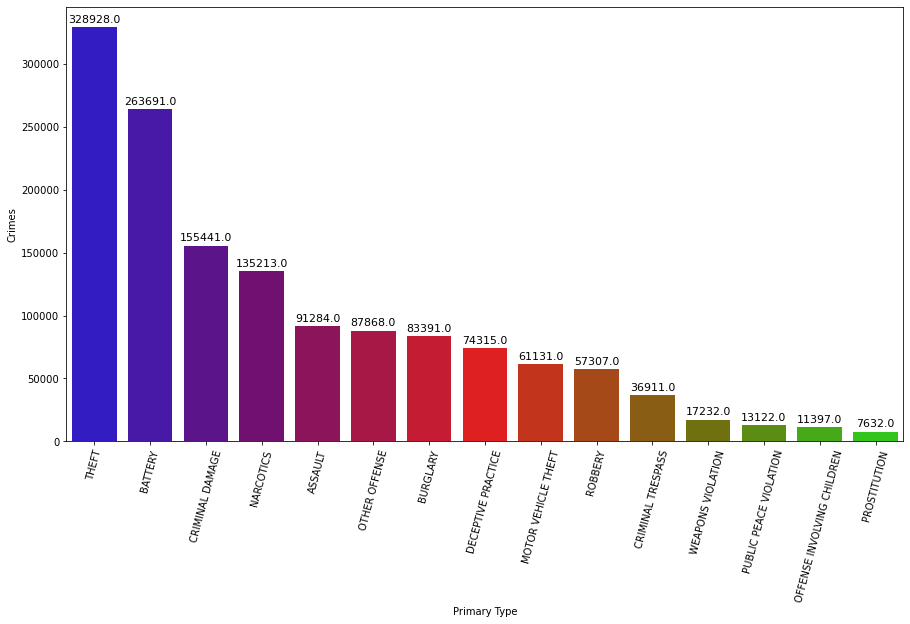

In [75]:
PrimaryType = df2["Primary Type"]
PrimaryTypeCounted = Counter(PrimaryType)
MostCommonPT = PrimaryTypeCounted.most_common(15)
x,y = zip(*MostCommonPT)
x,y  = list(x),list(y)

plt.figure(figsize=(15,8))
ax = sns.barplot(x=x, y=y,palette = "brg")
for count in ax.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
plt.xticks(rotation= 75)
plt.xlabel("Primary Type")
plt.ylabel("Crimes")
plt.show()

#### From above we can say that Theft is the most common crime in chicago followed by Battery and others.

### WHAT ARE THE MOST COMMON PLACES OF CRIMES?

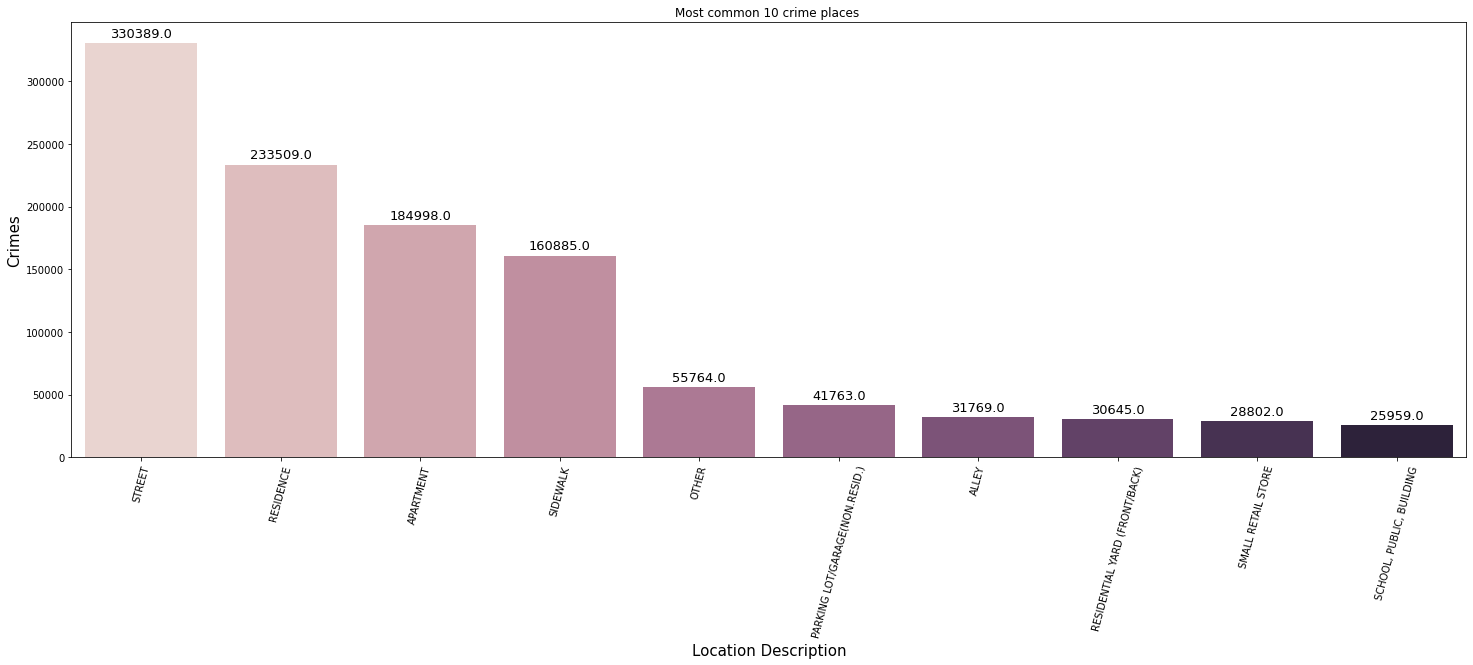

In [76]:
LocDescList = df2["Location Description"].unique()
LocDescList2 = df2["Location Description"]
LocDescRatio = []

counted = Counter(LocDescList2) 
mostcommon = counted.most_common(10)
x,y = zip(*mostcommon)
x,y = list(x),list(y)

plt.figure(figsize = (25,8))
ax = sns.barplot(x = x , y = y, palette = sns.cubehelix_palette(len(x)))
for count in ax.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 13, xytext = (0, 3), textcoords = 'offset points')
plt.xticks(rotation= 75)
plt.xlabel("Location Description", fontsize = (15))
plt.ylabel("Crimes", fontsize = (15))
plt.title("Most common 10 crime places ")
plt.show()

#### Most of the crimes are happening on streets.

### HOW MANY GOT ARRESTED AFTER COMMITING ANY TYPE OF CRIME

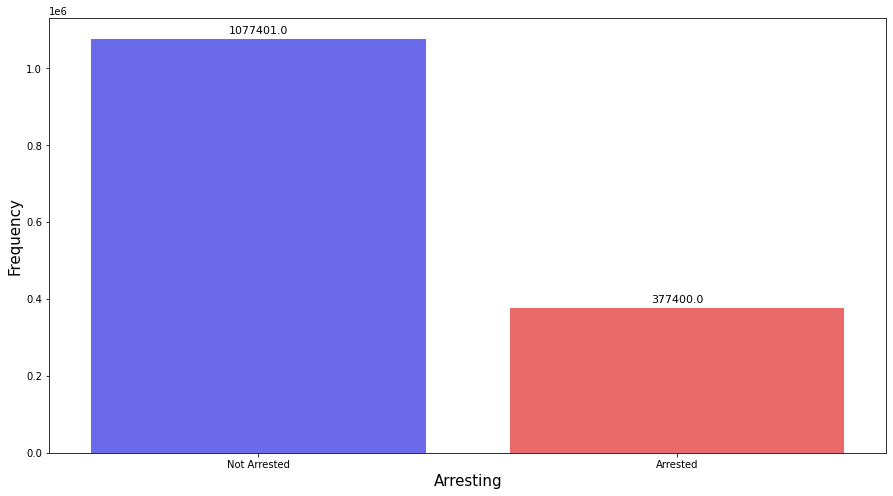

In [77]:
Arrest = df2["Arrest"]
CountedArrest = Counter(Arrest)
MostCommonCA = CountedArrest.most_common()
x,y = zip(*MostCommonCA)
x,y = list(x),list(y)
x[1] = "Arrested"
x[0] = "Not Arrested"

plt.figure(figsize=(15,8))
ax = sns.barplot(x = x , y = y , palette = "seismic")
for count in ax.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
plt.xlabel("Arresting", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.show()

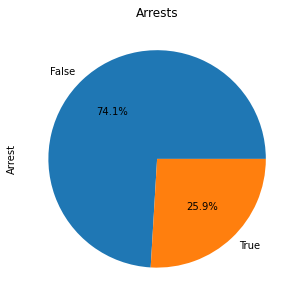

In [78]:
df2['Arrest'].value_counts()[:2].plot(kind='pie',autopct='%1.1f%%')
plt.title('Arrests')
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

#### From above analysis we can say that there can be two reasons of not having more arrests. 1st Its might be possible that the crimes were not that much big or serious, to arrest the criminal. or 2nd the criminal was not able to be found.

### Time Analysis

### Annual Analysis
#### The main purpose of the annual analysis is to find out that, how the amount of crimes have developed during the years in Chicago?

#### Is criminal activity increasing in the city ? Is the city taking measures for improving the security of the citizens year over year?

In [79]:
df2['date'] = df2['Date'].str[:11]
df2['time'] = df2['Date'].str[12:]

In [80]:
df2['date'] = pd.to_datetime(df2['date'])
df2['time'] = pd.to_datetime(df2['time'])

In [81]:
df2.index = df2.date
del df2['Date']
del df2['date']
df2.head(3)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location,time
date,,,,,,,,,,,,,,,,,,,
2016-05-03,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,41.864073,-87.706819,"41.864073157, -87.706818608",2022-11-26 13:40:00
2016-05-03,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,41.782922,-87.604363,"41.782921527, -87.60436317",2022-11-26 21:40:00
2016-05-03,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,2016,41.894908,-87.758372,"41.894908283, -87.758371958",2022-11-26 13:31:00


In [82]:
crime_year = df2.resample('Y').count()
crime_year = pd.DataFrame(crime_year.iloc[:,0])
crime_year.columns = ['Total_crime_per_year']
print(crime_year.head())
print(crime_year.tail())

            Total_crime_per_year
date                            
2012-12-31                335294
2013-12-31                306603
2014-12-31                274323
2015-12-31                262688
2016-12-31                264590
            Total_crime_per_year
date                            
2013-12-31                306603
2014-12-31                274323
2015-12-31                262688
2016-12-31                264590
2017-12-31                 11303


####  In the year 2017 the amount of data we have is not enough, there is no doubts that in comparison to other years the criminal activity shown is not accurate.

#### Therefore, the analysis will covers the years 2012 to 2016.

In [83]:
df2 = df2['2012' : '2016']

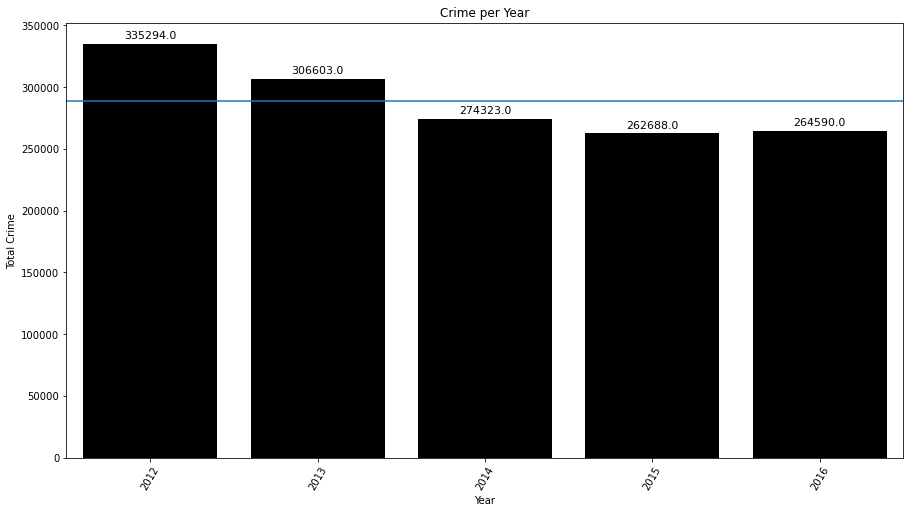

In [88]:
crime_year = crime_year['2012' : '2016']

a = crime_year.index
b = np.arange(2012,2017)

ax = sns.barplot(x = a ,y = 'Total_crime_per_year', data = crime_year, color = 'black')
for count in ax.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
ax.set_xticklabels(b, rotation = 60)
plt.ylabel('Total Crime')
plt.xlabel('Year')
plt.title('Crime per Year')
plt.axhline(crime_year['Total_crime_per_year'].mean())
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [89]:
print('- Crime Activity 2012-2014')
Value_a = ((crime_year['2014'].values- crime_year['2012'].values)/crime_year['2014'].values)*100
print('%.2f' % Value_a, '% has been the crime activity increment from 2012 to 2014', '\n')

print('- Crime Activity 2014-2017')
Value_b = ((crime_year['2014'].values- crime_year['2016'].values)/crime_year['2014'].values)*100
print("%.2f" % Value_b, '% has been the crime activity increment from 2014 to 2017', '\n')

- Crime Activity 2012-2014
-22.23 % has been the crime activity increment from 2012 to 2014 

- Crime Activity 2014-2017
3.55 % has been the crime activity increment from 2014 to 2017 



### Monthly Analysis
#### This part of the analysis presents a study of the evolution of crime, month by month, between 2012 to 2016 as in the previous case.

#### Using a graph I will try to identify patterns during a year, So that we could know, what months are the most dangerous? This could answer questions like:

#### What months are the safest during the year in the city of Chicago?
#### In which situation you wish to visit the city of Chicago, apart from the weather, what is the best month?


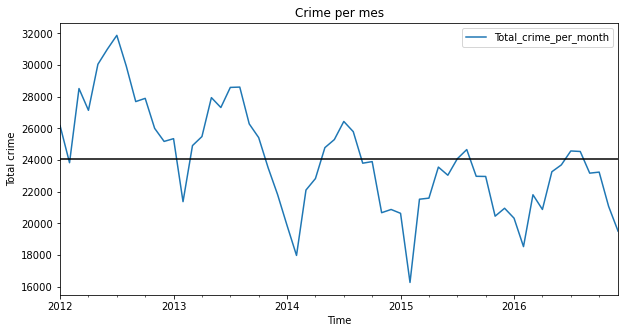

In [90]:
crime_month = df2.resample('M').count()
crime_month = pd.DataFrame(crime_month.iloc[:,0])
crime_month.columns = ['Total_crime_per_month']

crime_month.plot()
plt.xlabel('Time')
plt.ylabel('Total crime')
plt.title('Crime per mes')
plt.axhline(crime_month['Total_crime_per_month'].mean(), color = 'black')
fig=plt.gcf()
fig.set_size_inches(10,5)

#### As can be seen, in the above yearly pattern. There are some months during the year when there is more crime activity and another with less. I am going to analyze these months. 

#### Group for differents period of year this pattern can be seen more clearly.


#### Analysis of the months with more crime activity

In [91]:
print('Top 5 months with more crime activity from 2012 to 2013')
print(crime_month['2012':'2013'].sort_values('Total_crime_per_month', ascending = False).head(), '\n')

print('Top 5 months with more crime activity from 2013 to 2014')
print(crime_month['2013':'2014'].sort_values('Total_crime_per_month', ascending = False).head(),  '\n')

print('Top 5 months with more crime activity from 2014 to 2015')
print(crime_month['2014':'2015'].sort_values('Total_crime_per_month', ascending = False).head(), '\n')

print('Top 5 months with more crime activity from 2015 to 2016')
print(crime_month['2015':'2016'].sort_values('Total_crime_per_month', ascending = False).head(), '\n')

Top 5 months with more crime activity from 2012 to 2013
            Total_crime_per_month
date                             
2012-07-31                  31878
2012-06-30                  31005
2012-05-31                  30051
2012-08-31                  29934
2013-08-31                  28609 

Top 5 months with more crime activity from 2013 to 2014
            Total_crime_per_month
date                             
2013-08-31                  28609
2013-07-31                  28589
2013-05-31                  27944
2013-06-30                  27318
2014-07-31                  26438 

Top 5 months with more crime activity from 2014 to 2015
            Total_crime_per_month
date                             
2014-07-31                  26438
2014-08-31                  25793
2014-06-30                  25293
2014-05-31                  24783
2015-08-31                  24662 

Top 5 months with more crime activity from 2015 to 2016
            Total_crime_per_month
date                  


#### In the above four tables it can be seen that in the months of summer, that is June, July and August. The crime was on its max.



#### Analysis of the months with less criminal activity

In [92]:
print('Top 5 months with less criminal activity from 2012 to 2013')
print (crime_month['2012':'2013'].sort_values('Total_crime_per_month').head(), '\n')

print('Top 5  months with less criminal activity from 2013 to 2014')
print(crime_month['2013':'2014'].sort_values('Total_crime_per_month').head(), '\n')

print('Top 5 months with less criminal activity from 2014 to 2015')
print(crime_month['2014':'2015'].sort_values('Total_crime_per_month').head(), '\n')

print('Top 5 months with less criminal activity from 2015 to 2016')
print(crime_month['2015':'2016'].sort_values('Total_crime_per_month').head(), '\n')

Top 5 months with less criminal activity from 2012 to 2013
            Total_crime_per_month
date                             
2013-02-28                  21370
2013-12-31                  21817
2013-11-30                  23510
2012-02-29                  23830
2013-03-31                  24912 

Top 5  months with less criminal activity from 2013 to 2014
            Total_crime_per_month
date                             
2014-02-28                  17972
2014-01-31                  19864
2014-11-30                  20672
2014-12-31                  20876
2013-02-28                  21370 

Top 5 months with less criminal activity from 2014 to 2015
            Total_crime_per_month
date                             
2015-02-28                  16265
2014-02-28                  17972
2014-01-31                  19864
2015-11-30                  20452
2015-01-31                  20633 

Top 5 months with less criminal activity from 2015 to 2016
            Total_crime_per_month
date     

#### The months with less criminal activity that we find in the analysis are those in winter and autumn.

#### Let's look at the previous analysis in a plot:

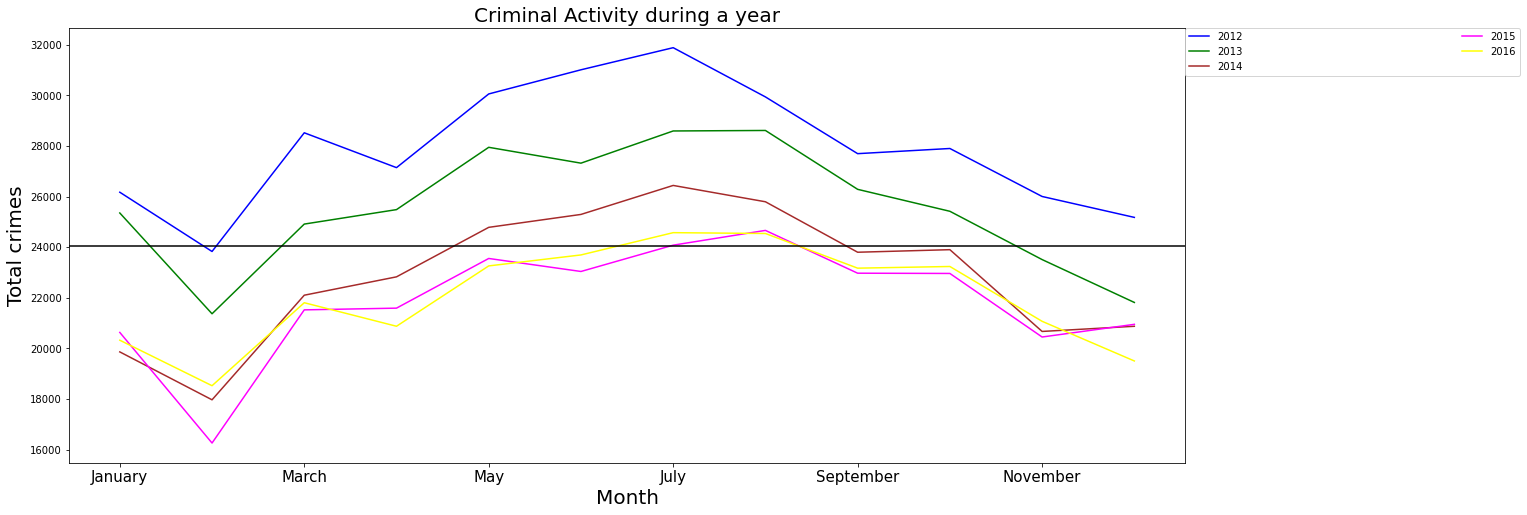

In [93]:
fig, ax = plt.subplots()

ax.plot(crime_month['2012'].values, color = 'Blue', label = '2012')
ax.plot(crime_month['2013'].values, color = 'Green', label = '2013')
ax.plot(crime_month['2014'].values, color = 'Brown', label = '2014')
ax.plot(crime_month['2015'].values, color = 'Magenta', label = '2015')
ax.plot(crime_month['2016'].values, color = 'Yellow', label = '2016')

plt.xlabel('Month', fontsize = 20)
plt.ylabel('Total crimes', fontsize = 20)
plt.title('Criminal Activity during a year', fontsize = 20)
plt.axhline(crime_month['Total_crime_per_month'].mean(), color = 'black')

c = ['January','January','March','May','July','September','November']
ax.set_xticklabels(c, fontsize = 15)

plt.legend(bbox_to_anchor=(1, 0, .3, 1), loc=2,
           ncol=2, mode="expand", borderaxespad=0)

fig=plt.gcf()
fig.set_size_inches(20,8)

#### In the graphic, as it was concluded analytically , it can be seen how the summer months are when the criminal activity is higher. 

### What are the locations, where the crimes happens more often?

In [94]:
df2['Location Description'].value_counts().head(20)

STREET                            327715
RESIDENCE                         231503
APARTMENT                         183387
SIDEWALK                          160187
OTHER                              55311
PARKING LOT/GARAGE(NON.RESID.)     41368
ALLEY                              31543
RESIDENTIAL YARD (FRONT/BACK)      30470
SMALL RETAIL STORE                 28527
SCHOOL, PUBLIC, BUILDING           25851
RESTAURANT                         25562
RESIDENCE-GARAGE                   25504
RESIDENCE PORCH/HALLWAY            25336
VEHICLE NON-COMMERCIAL             24927
DEPARTMENT STORE                   20542
GROCERY FOOD STORE                 15865
GAS STATION                        15185
PARK PROPERTY                      12239
BAR OR TAVERN                       9767
COMMERCIAL / BUSINESS OFFICE        7637
Name: Location Description, dtype: int64

#### TAKING THOSE LOCATIONS WHICH HAVE MORE THAN 15000 CASES

In [95]:
Crimes2 = pd.DataFrame(df2[df2['Location Description'].isin(['APARTMENT','RESIDENCE', 'STREET', 'SIDEWALK','OTHER','ALLEY','RESTAURANT','GAS STATION','PARKING LOT/GARAGE','RESIDENTIAL YARD','SMALL RETAIL STORE','SCHOOL, PUBLIC, BUILDING','RESIDENCE-GARAGE','RESIDENCE PORCH/HALLWAY','VEHICLE NON-COMMERCIAL','DEPARTMENT STORE'])])
Crimes2.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Location,time
date,,,,,,,,,,,,,,,,,,,
2016-05-03,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,2016,41.864073,-87.706819,"41.864073157, -87.706818608",2022-11-26 13:40:00
2016-05-03,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,2016,41.782922,-87.604363,"41.782921527, -87.60436317",2022-11-26 21:40:00
2016-05-03,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,2016,41.894908,-87.758372,"41.894908283, -87.758371958",2022-11-26 13:31:00
2016-05-03,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,2016,41.885687,-87.749516,"41.885686845, -87.749515983",2022-11-26 12:10:00
2016-05-03,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,2016,41.886297,-87.761751,"41.886297242, -87.761750709",2022-11-26 12:00:00


In [96]:
Crimes2['Location Description'].value_counts()

STREET                      327715
RESIDENCE                   231503
APARTMENT                   183387
SIDEWALK                    160187
OTHER                        55311
ALLEY                        31543
SMALL RETAIL STORE           28527
SCHOOL, PUBLIC, BUILDING     25851
RESTAURANT                   25562
RESIDENCE-GARAGE             25504
RESIDENCE PORCH/HALLWAY      25336
VEHICLE NON-COMMERCIAL       24927
DEPARTMENT STORE             20542
GAS STATION                  15185
Name: Location Description, dtype: int64

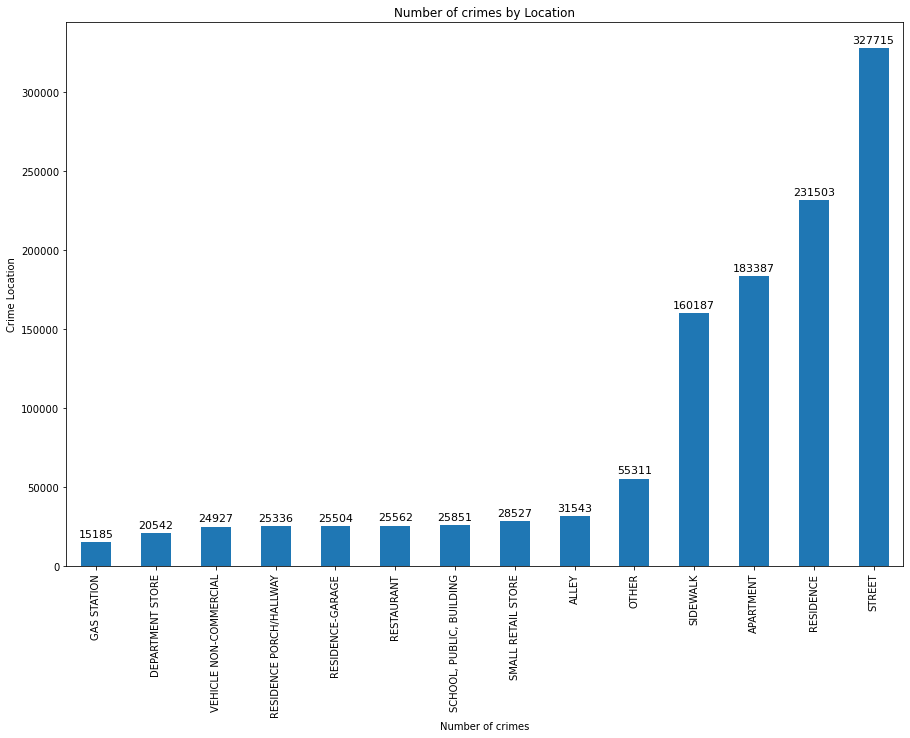

In [97]:
plt.figure(figsize=(15,10))

ax = Crimes2.groupby([Crimes2['Location Description']]).size().sort_values(ascending=True).plot(kind='bar')
labels = ['APARTMENT','RESIDENCE', 'STREET', 'SIDEWALK','OTHER','ALLEY','RESTAURANT','GAS STATION']
for count in ax.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

#### As we can see here, clearly that STREET is the most common location. Followed by RESIDENCE and APARTMENT.

### CORRELATION

In [98]:
df2.corr()

,ID,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude
ID,1.000000,-0.057859,0.017343,-0.004226,-0.000669,0.007800,-0.014380,0.840432,0.013592,-0.001083
Arrest,-0.057859,1.000000,-0.063274,-0.021671,-0.021501,-0.010417,0.016644,-0.054043,-0.018974,-0.032653
Domestic,0.017343,-0.063274,1.000000,-0.046202,-0.045975,-0.064804,0.075194,0.018115,-0.078215,0.011813
Beat,-0.004226,-0.021671,-0.046202,1.000000,0.997361,0.683457,-0.493976,-0.009122,0.586150,-0.493433
District,-0.000669,-0.021501,-0.045975,0.997361,1.000000,0.687100,-0.494192,-0.005686,0.587244,-0.496029
Ward,0.007800,-0.010417,-0.064804,0.683457,0.687100,1.000000,-0.542167,0.003027,0.605872,-0.405879
Community Area,-0.014380,0.016644,0.075194,-0.493976,-0.494192,-0.542167,1.000000,-0.008631,-0.710131,0.223630
Year,0.840432,-0.054043,0.018115,-0.009122,-0.005686,0.003027,-0.008631,1.000000,0.008085,-0.000679
Latitude,0.013592,-0.018974,-0.078215,0.586150,0.587244,0.605872,-0.710131,0.008085,1.000000,-0.275646
Longitude,-0.001083,-0.032653,0.011813,-0.493433,-0.496029,-0.405879,0.223630,-0.000679,-0.275646,1.000000


#### Filtering the areas with more criminal activity, I will analyze which police districts have an action on differents areas and also what types of crimes are the most common in those communities areas.

In [99]:
df2['Community Area'].unique()

array([29., 42., 25., 44., 35., 38.,  1., 67., 43.,  8., 28., 24., 66.,
       40., 73., 39., 41.,  7., 10., 34., 58., 71., 32., 23.,  6., 77.,
       49., 61., 21., 54., 56., 46., 19., 60., 68., 59., 22., 26., 45.,
       30., 11., 69., 31.,  3., 15.,  2., 63., 36., 75., 65., 17., 13.,
       33., 14., 27., 16., 47., 37., 53.,  9., 51., 50., 76., 62.,  4.,
       57., 52., 70., 48., 18., 20.,  5., 64., 12., 74., 55., 72.,  0.])

In [100]:
e = df2[['District', 'Community Area' ]]
e.index = e['Community Area']
del e['Community Area']

h = e[e.index.get_level_values('Community Area').isin([25, 43, 8, 23, 67, 
                                                        24, 71, 28, 29, 68, 49, 
                                                        66, 69, 32, 22])]
h = h.reset_index() 
h = pd.DataFrame (h.groupby(['District','Community Area']).size())
h.columns = ['Total District']
h.head()

Total District
District Community Area                
1.0      8.0                          2
         28.0                      8842
         32.0                     39190
2.0      8.0                          1
         68.0                       434

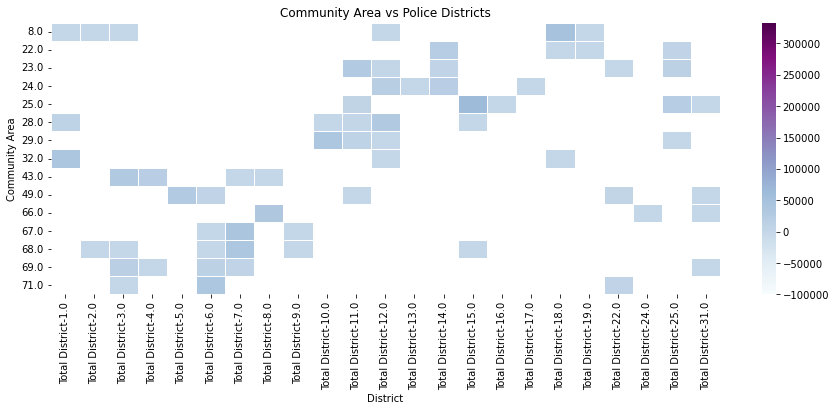

In [101]:
fig = plt.figure()

sns.heatmap(h.unstack(level=0), linewidths=.5, cmap="BuPu",vmin=-100000, vmax=333040)

plt.ylabel('Community Area')
plt.xlabel('District')
plt.title('Community Area vs Police Districts')

fig = plt.gcf()
fig.set_size_inches(15,5)

In [102]:
print('Top 10 police districts')
print(df2.District.value_counts().head(10).index)

Top 10 police districts
Float64Index([11.0, 8.0, 6.0, 4.0, 7.0, 25.0, 3.0, 9.0, 12.0, 10.0], dtype='float64')


In [103]:
print('Top 10 community Areas')
print(df2['Community Area'].value_counts().head(10).index)

Top 10 community Areas
Float64Index([25.0, 8.0, 43.0, 23.0, 29.0, 28.0, 71.0, 67.0, 24.0, 32.0], dtype='float64')


#### All the districts with the most registered crimes have been worked in the communities with the most registered activity.

In [104]:
import folium

MapOfChicago = folium.Map(location=[41.881832, -87.623177],
                         zoom_start=11)

In [105]:
Crimes = df2.dropna()
Crimes = Crimes.drop(columns=['Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward', 'FBI Code'], axis = 1)

In [106]:
Crimes = Crimes[Crimes["Primary Type"] == "THEFT"]
locations = Crimes.groupby('Community Area').first()
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [107]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}
                Arrest : {}
                Location Description : {}"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(MapOfChicago)
MapOfChicago